In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as colormap
import numpy as np
np.random.seed(1)

from matplotlib import rc

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
#rc('mathtext',**{'default':'regular'})
#%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_acc(accdict):
    figure = plt.gcf()
    figure.set_size_inches(12, 6)
    ax = plt.subplot()
    plt.ylabel('Accuracy')
    plt.xlabel('Fold')
    for index in accdict.keys():
        plt.plot(accdict[index].values()[0], label=accdict[index].keys()[0], linewidth=1.0)
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,0.75,1.0))
    plt.legend()
    box = ax.get_position()
    ax.legend(loc='lower right')
    #plt.tight_layout()
    
    spacing = 1
    minorLocator = MultipleLocator(spacing)
    ax.xaxis.set_minor_locator(minorLocator)
    ax.grid(which = 'minor')
    plt.xticks(np.arange(0, 10, 1.0))
    
    plt.grid(True)
    plt.show()

In [3]:
accdict = {}

vgg19 = [0.9131, 0.9061, 0.9098, 0.9006, 0.9203, 0.9070, 0.9237, 0.9167, 0.9195, 0.9263]
vgg16 = [0.9219, 0.9100, 0.9108, 0.9006, 0.9252, 0.9031, 0.9148, 0.9097, 0.9105, 0.9133]
xception = [0.9053, 0.8836, 0.8912, 0.8858, 0.8957, 0.8863, 0.8930, 0.8948, 0.8996, 0.9064]
resnet50 = [0.9014, 0.8855, 0.8951, 0.8898, 0.8947, 0.8833, 0.8979, 0.8929, 0.8996, 0.8994]
inceptionv3 = [0.8906, 0.8767, 0.8814, 0.8691, 0.8740, 0.8734, 0.8821, 0.8839, 0.8827, 0.8934]
GIST = [0.7627, 0.7847, 0.7667, 0.7756, 0.7884, 0.7804, 0.7750, 0.7847, 0.7863, 0.7819]

accdict = {0: {'GIST': GIST},
           1: {'VGG16': vgg16},
           2: {'VGG19': vgg19},
           3: {'Inception V3': inceptionv3},
           4: {'Xception': xception},
           5: {'ResNet-50': resnet50}}

In [4]:
for i in accdict.keys():
    print(accdict[i])

{'GIST': [0.7627, 0.7847, 0.7667, 0.7756, 0.7884, 0.7804, 0.775, 0.7847, 0.7863, 0.7819]}
{'VGG16': [0.9219, 0.91, 0.9108, 0.9006, 0.9252, 0.9031, 0.9148, 0.9097, 0.9105, 0.9133]}
{'VGG19': [0.9131, 0.9061, 0.9098, 0.9006, 0.9203, 0.907, 0.9237, 0.9167, 0.9195, 0.9263]}
{'Inception V3': [0.8906, 0.8767, 0.8814, 0.8691, 0.874, 0.8734, 0.8821, 0.8839, 0.8827, 0.8934]}
{'Xception': [0.9053, 0.8836, 0.8912, 0.8858, 0.8957, 0.8863, 0.893, 0.8948, 0.8996, 0.9064]}
{'ResNet-50': [0.9014, 0.8855, 0.8951, 0.8898, 0.8947, 0.8833, 0.8979, 0.8929, 0.8996, 0.8994]}


In [5]:
for i in accdict.keys():
    print("%s average: %.4f (+-%.4f)" %(accdict[i].keys()[0],np.mean(accdict[i].values()[0]),np.std(accdict[i].values()[0])))

GIST average: 0.7786 (+-0.0081)
VGG16 average: 0.9120 (+-0.0071)
VGG19 average: 0.9143 (+-0.0079)
Inception V3 average: 0.8807 (+-0.0072)
Xception average: 0.8942 (+-0.0075)
ResNet-50 average: 0.8940 (+-0.0058)


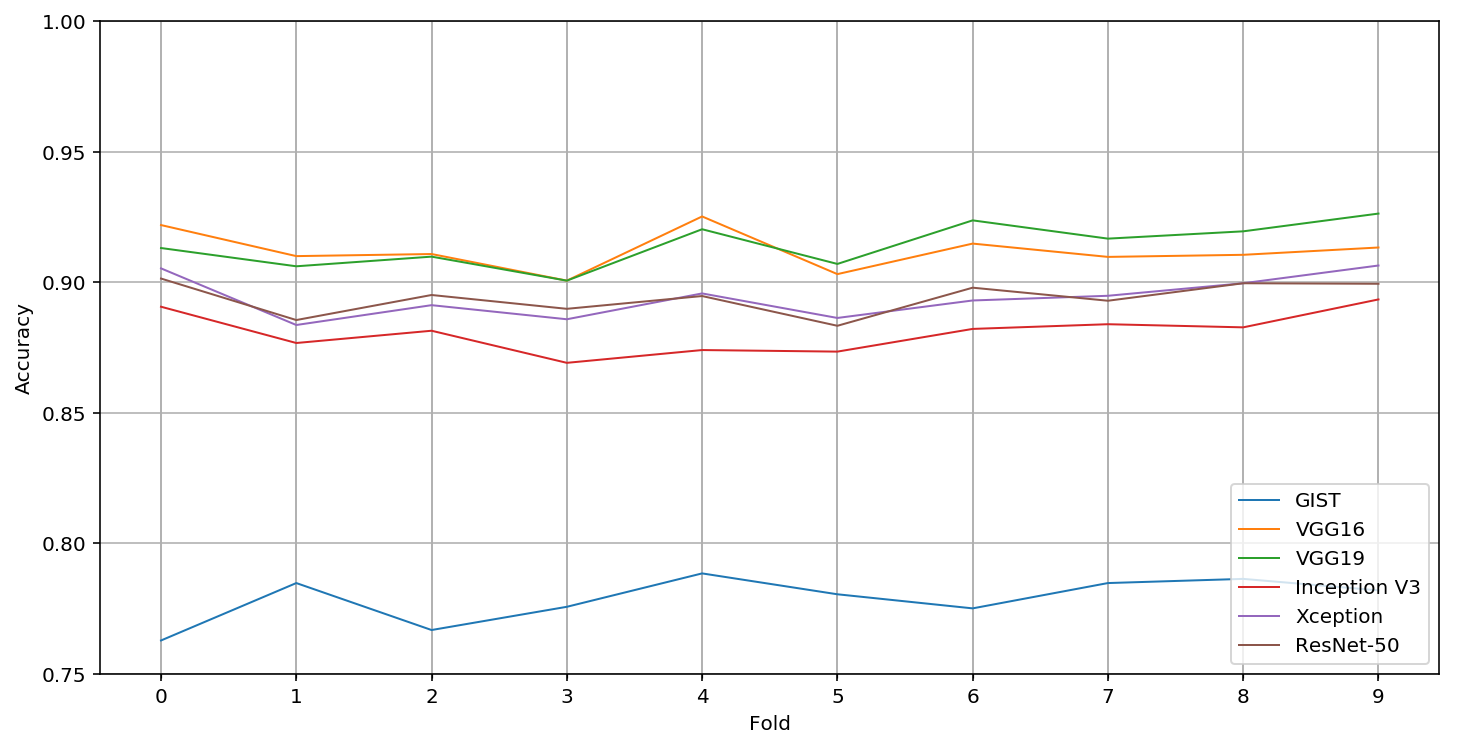

In [6]:
plot_acc(accdict)

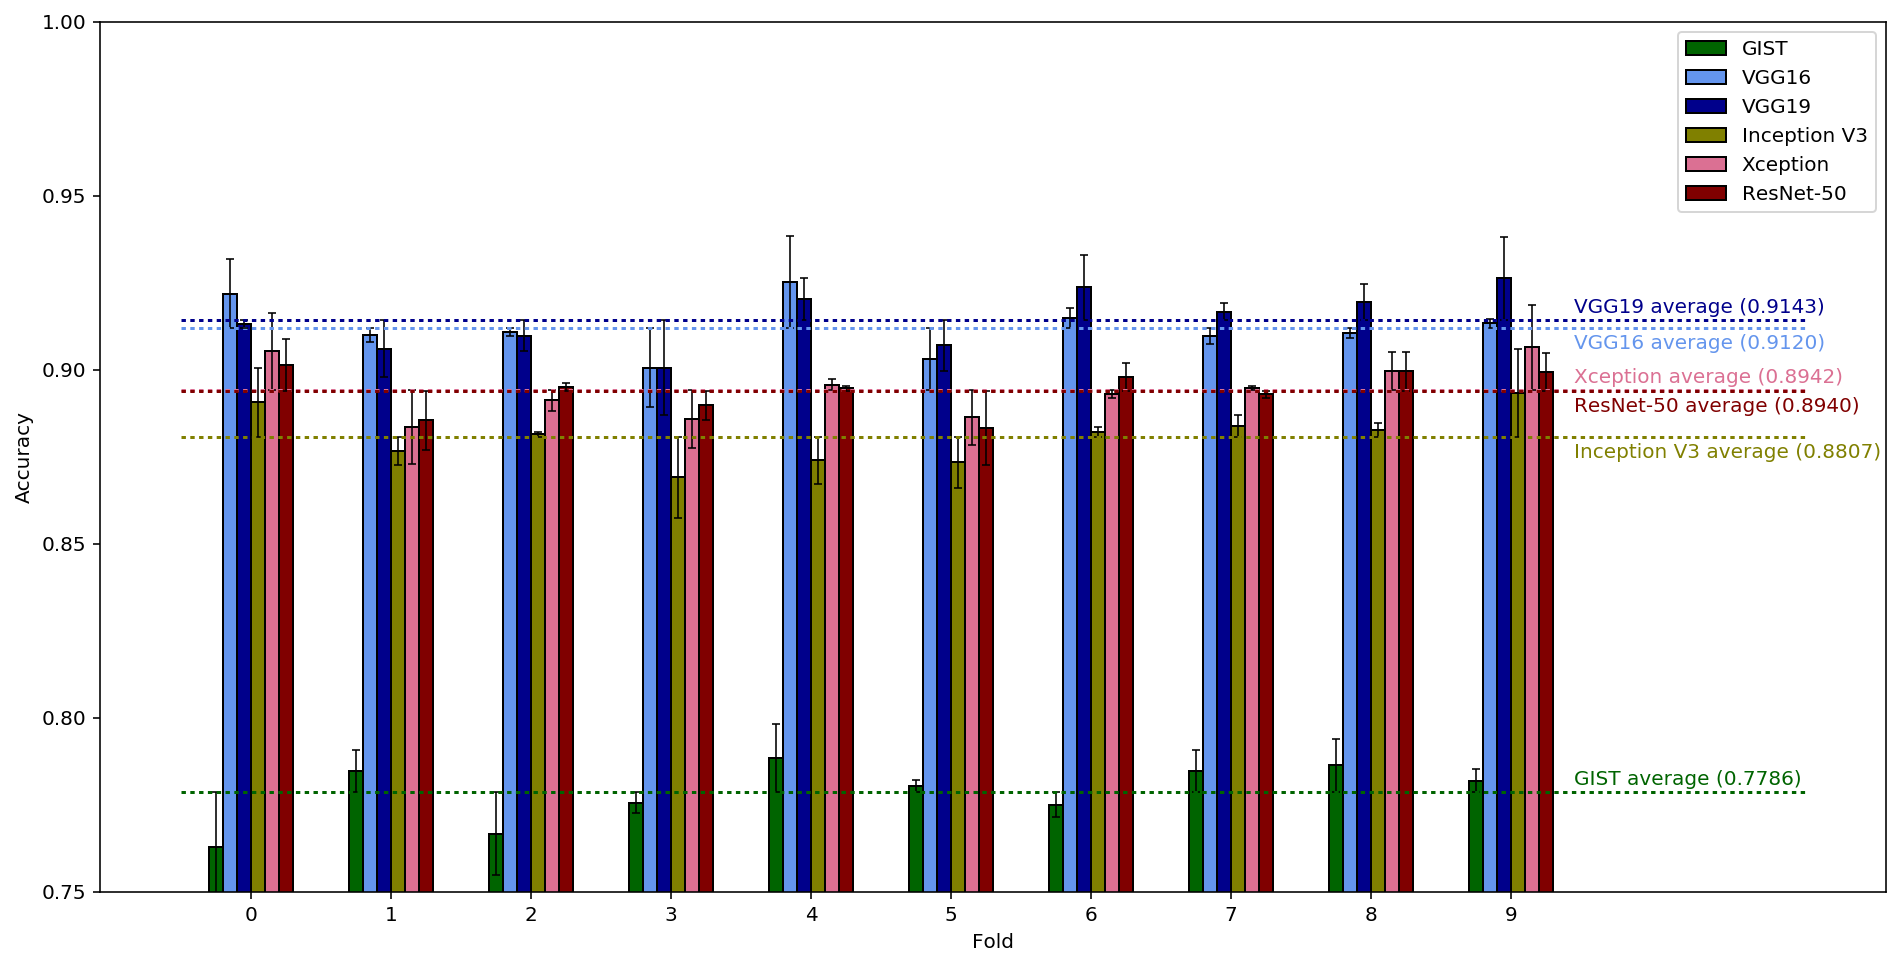

In [7]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
ax = plt.subplot()
error_kw = {'capsize': 2, 'capthick': 0.8, 'ecolor': 'black', 'lw' : 0.8}
lstart = -1
lend = 22.2
ls = ":"

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

GISTstd = np.absolute(np.array(GIST)-np.mean(GIST))
rects1 = ax.bar(2*ind-2.5*width, GIST, width, color='darkgreen', edgecolor='black', yerr=GISTstd, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(GIST),np.mean(GIST)], color='darkgreen',linestyle=ls)
plt.text(lend-3.3, np.mean(GIST)+0.002, 'GIST average (%.4f)' %(np.mean(GIST)), color='darkgreen')

vgg16std = np.absolute(np.array(vgg16)-np.mean(vgg16))
rects2 = ax.bar(2*ind-1.5*width, vgg16, width, color='cornflowerblue', edgecolor='black', yerr=vgg16std, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(vgg16),np.mean(vgg16)], color='cornflowerblue', linestyle=ls)
plt.text(lend-3.3, np.mean(vgg16)-0.006, 'VGG16 average (%.4f)' %(np.mean(vgg16)), color='cornflowerblue')

vgg19std = np.absolute(np.array(vgg19)-np.mean(vgg19))
rects3 = ax.bar(2*ind-0.5*width, vgg19, width, color='darkblue', edgecolor='black', yerr=vgg19std, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(vgg19),np.mean(vgg19)], color='darkblue', linestyle=ls)
plt.text(lend-3.3, np.mean(vgg19)+0.002, 'VGG19 average (%.4f)' %(np.mean(vgg19)), color='darkblue')

inceptionv3std = np.absolute(np.array(inceptionv3)-np.mean(inceptionv3))
rects4 = ax.bar(2*ind+0.5*width, inceptionv3, width, color='olive', edgecolor='black', yerr=inceptionv3std, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(inceptionv3),np.mean(inceptionv3)], color='olive', linestyle=ls)
plt.text(lend-3.3, np.mean(inceptionv3)-0.006, 'Inception V3 average (%.4f)' %(np.mean(inceptionv3)), color='olive')

xceptionstd = np.absolute(np.array(xception)-np.mean(xception))
rects5 = ax.bar(2*ind+1.5*width, xception, width, color='palevioletred', edgecolor='black', yerr=xceptionstd, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(xception),np.mean(xception)], color='palevioletred', linestyle=ls)
plt.text(lend-3.3, np.mean(xception)+0.002, 'Xception average (%.4f)' %(np.mean(xception)), color='palevioletred')

resnet50std = np.absolute(np.array(resnet50)-np.mean(resnet50))
rects6 = ax.bar(2*ind+2.5*width, resnet50, width, color='maroon', edgecolor='black', yerr=resnet50std, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(resnet50),np.mean(resnet50)], color='maroon', linestyle=ls)
plt.text(lend-3.3, np.mean(resnet50)-0.006, 'ResNet-50 average (%.4f)' %(np.mean(resnet50)), color='maroon')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_xlabel('Fold')
ax.set_xticks(2*ind)
ax.set_xticklabels(ind)

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]), [accdict[index].keys()[0] for index in accdict.keys()])

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.75,1.0))
plt.show()